In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install scikit-learn


In [3]:
df=pd.read_csv('diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
df.replace('?',pd.NA,inplace=True)

In [6]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
import pandas as pd
# as this columns are having more than 50% missing values in the column i am removing them
columns_to_drop = ['A1Cresult', 'max_glu_serum', 'medical_specialty','weight',]  # Replace with your actual column names
df.drop(columns=columns_to_drop, inplace=True)


In [8]:
import pandas as pd
#as this columns are having less than 5 % missing values i have removed those rows with the missing values
columns_to_check = ['diag_1', 'diag_2','diag_3','race']  
df.dropna(subset=columns_to_check, inplace=True)


In [9]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  38924
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone  

In [10]:
df.shape

(98053, 46)

In [11]:
import pandas as pd
# this is the only column that has 5%< and >50% missing values
column_name = 'payer_code' 
# checking the data type of this columns
data_type = df[column_name].dtype
print("Data type of column {}: {}".format(column_name, data_type))


Data type of column payer_code: object


In [12]:
import pandas as pd
# in this i tried one-hot encoding for payer code to see how the values are getting imputed 
df_encoded = pd.get_dummies(df, columns=['payer_code'], prefix=['payer_code'], dummy_na=True)


In [13]:
df_encoded.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,payer_code_nan
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,False,False,False,False,False,False,False,False,False,True
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,False,False,False,False,False,False,False,False,False,True
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,False,False,False,False,False,False,False,False,False,True
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,False,False,False,False,False,False,False,False,False,True
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,False,False,False,False,False,False,False,False,False,True


In [14]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  38924
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone  

In [15]:
df_encoded  #this is done with one-hot encoding for payer_cod ecolumn in the coming 
            # in the coming code i have changed the original dataset with label encoding rather than one hot encoding as it is reducing the columns and making it more easy to understand

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,payer_code_nan
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,False,False,False,False,False,False,False,False,False,True
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,False,False,False,False,False,False,False,False,False,True
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,False,False,False,False,False,False,False,False,False,True
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,False,False,False,False,False,False,False,False,False,True
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,False,False,False,False,False,False,False,False,False,False
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,False,False,False,False,False,False,False,False,False,False
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,False,False,False,False,False,False,False,False,False,False
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df_encoded.isna().sum()

encounter_id      0
patient_nbr       0
race              0
gender            0
age               0
                 ..
payer_code_SI     0
payer_code_SP     0
payer_code_UN     0
payer_code_WC     0
payer_code_nan    0
Length: 62, dtype: int64

In [17]:
import pandas as pd
#i wanted to see the data types of all the columns 
column_data_types = df.dtypes
print("Column Name\tData Type")
print("------------------------")
for column, dtype in column_data_types.items():
    print(f"{column}\t\t{dtype}")


Column Name	Data Type
------------------------
encounter_id		int64
patient_nbr		int64
race		object
gender		object
age		object
admission_type_id		int64
discharge_disposition_id		int64
admission_source_id		int64
time_in_hospital		int64
payer_code		object
num_lab_procedures		int64
num_procedures		int64
num_medications		int64
number_outpatient		int64
number_emergency		int64
number_inpatient		int64
diag_1		object
diag_2		object
diag_3		object
number_diagnoses		int64
metformin		object
repaglinide		object
nateglinide		object
chlorpropamide		object
glimepiride		object
acetohexamide		object
glipizide		object
glyburide		object
tolbutamide		object
pioglitazone		object
rosiglitazone		object
acarbose		object
miglitol		object
troglitazone		object
tolazamide		object
examide		object
citoglipton		object
insulin		object
glyburide-metformin		object
glipizide-metformin		object
glimepiride-pioglitazone		object
metformin-rosiglitazone		object
metformin-pioglitazone		object
change		object
diabetesMed		object

In [18]:
# Convert columns to appropriate data types for visualization
df['race'] = df['race'].astype('category')
df['gender'] = df['gender'].astype('category')
df['age'] = df['age'].astype('category')
df['payer_code'] = df['payer_code'].astype('category')
df['diag_1'] = df['diag_1'].astype('category')
df['diag_2'] = df['diag_2'].astype('category')
df['diag_3'] = df['diag_3'].astype('category')

# Convert medication columns to categorical data type
medication_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                      'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
                      'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                      'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
                      'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
                      'metformin-pioglitazone']
df[medication_columns] = df[medication_columns].astype('category')

# Convert other categorical columns to categorical data type
other_categorical_columns = ['change', 'diabetesMed', 'readmitted']
df[other_categorical_columns] = df[other_categorical_columns].astype('category')


In [19]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame name

# Get the data types of each column
column_data_types = df.dtypes

# Print column names along with their data types
print("Column Name\tData Type")
print("------------------------")
for column, dtype in column_data_types.items():
    print(f"{column}\t\t{dtype}")


Column Name	Data Type
------------------------
encounter_id		int64
patient_nbr		int64
race		category
gender		category
age		category
admission_type_id		int64
discharge_disposition_id		int64
admission_source_id		int64
time_in_hospital		int64
payer_code		category
num_lab_procedures		int64
num_procedures		int64
num_medications		int64
number_outpatient		int64
number_emergency		int64
number_inpatient		int64
diag_1		category
diag_2		category
diag_3		category
number_diagnoses		int64
metformin		category
repaglinide		category
nateglinide		category
chlorpropamide		category
glimepiride		category
acetohexamide		category
glipizide		category
glyburide		category
tolbutamide		category
pioglitazone		category
rosiglitazone		category
acarbose		category
miglitol		category
troglitazone		category
tolazamide		category
examide		category
citoglipton		category
insulin		category
glyburide-metformin		category
glipizide-metformin		category
glimepiride-pioglitazone		category
metformin-rosiglitazone		category
metform

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Here i have done the label encoding for all the columns so that they are converted to the numerical representaiion 
# before for payer_code i have did one hot encoding but it was increasing the number of columns so i chose to do the label encoding
label_encoder = LabelEncoder()
for column in df.columns:
  
    if not pd.api.types.is_numeric_dtype(df[column]):
    
        df[column] = label_encoder.fit_transform(df[column])

print(df)


        encounter_id  patient_nbr  race  gender  age  admission_type_id  \
1             149190     55629189     2       0    1                  1   
2              64410     86047875     0       0    2                  1   
3             500364     82442376     2       1    3                  1   
4              16680     42519267     2       1    4                  1   
5              35754     82637451     2       1    5                  2   
...              ...          ...   ...     ...  ...                ...   
101761     443847548    100162476     0       1    7                  1   
101762     443847782     74694222     0       0    8                  1   
101763     443854148     41088789     2       1    7                  1   
101764     443857166     31693671     2       0    8                  2   
101765     443867222    175429310     2       1    7                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                       

In [22]:
import pandas as pd                                              #using label encoding converted the column payer code as one hot encoding is increasing the cols 
from sklearn.preprocessing import LabelEncoder

original_df = df.copy()
label_encoder = LabelEncoder()
for column in df.columns:

    if not pd.api.types.is_numeric_dtype(df[column]):
       
        df[column] = label_encoder.fit_transform(df[column])
print("Data types before label encoding:")
print(original_df.dtypes)
print("\nData types after label encoding:")
print(df.dtypes)
# after the label encoding in this step i can see that all my categrical values have been chaged to numerical representation

Data types before label encoding:
encounter_id                int64
patient_nbr                 int64
race                        int32
gender                      int32
age                         int32
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
payer_code                  int32
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int32
diag_2                      int32
diag_3                      int32
number_diagnoses            int64
metformin                   int32
repaglinide                 int32
nateglinide                 int32
chlorpropamide              int32
glimepiride                 int32
acetohexamide               int32
glipizide                   int32
glyburide                   int32
tolbutamide   

In [24]:
import pandas as pd
#standardization

#calculatiing mean
mean_per_column = df.mean()

#Calculating the standard deviation
std_per_column = df.std()

#  Subtract the mean and divide by the standard deviation for each value
df = (df - mean_per_column) / std_per_column
#now we get the standardized data in my df


In [25]:
print(df.head())
#displays the first 5 rows of my df to check the standardized form 

   encounter_id  patient_nbr      race    gender       age  admission_type_id  \
1     -1.617463     0.020208  0.396093 -0.925127 -3.287869            -0.7074   
2     -1.618290     0.806998 -1.927107 -0.925127 -2.646463            -0.7074   
3     -1.614034     0.713741  0.396093  1.080833 -2.005057            -0.7074   
4     -1.618756    -0.318885  0.396093  1.080833 -1.363651            -0.7074   
5     -1.618570     0.718786  0.396093  1.080833 -0.722245            -0.0178   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
1                 -0.518584             0.300446         -0.475089   
2                 -0.518584             0.300446         -0.809193   
3                 -0.518584             0.300446         -0.809193   
4                 -0.518584             0.300446         -1.143298   
5                 -0.518584            -0.927561         -0.475089   

   payer_code  ...  citoglipton   insulin  glyburide-metformin  \
1    1.088953  ...        

In [26]:
#i wanted to drop these columns 
columns_to_drop = ['examide', 'citoglipton', 'metformin-rosiglitazone']
df.drop(columns=columns_to_drop, inplace=True)




Explained Variance Ratio:
[0.05762194 0.04964133 0.04384387 0.0353686  0.03151629 0.02909662
 0.02646573 0.02524126 0.02505091 0.02468068 0.02435788 0.02413558
 0.02394839 0.02344571 0.02338354 0.02331999 0.02327945 0.0232684
 0.02326485 0.02322234 0.02321889 0.02314263 0.02303263 0.02290749
 0.02264422 0.02254898 0.02175594 0.02151367 0.02119591 0.02069234
 0.02012504 0.01943421 0.01899708 0.01724272 0.01638982 0.01619416
 0.01583133 0.01391694 0.01340587 0.01222288 0.0107019  0.00997745
 0.00875457]


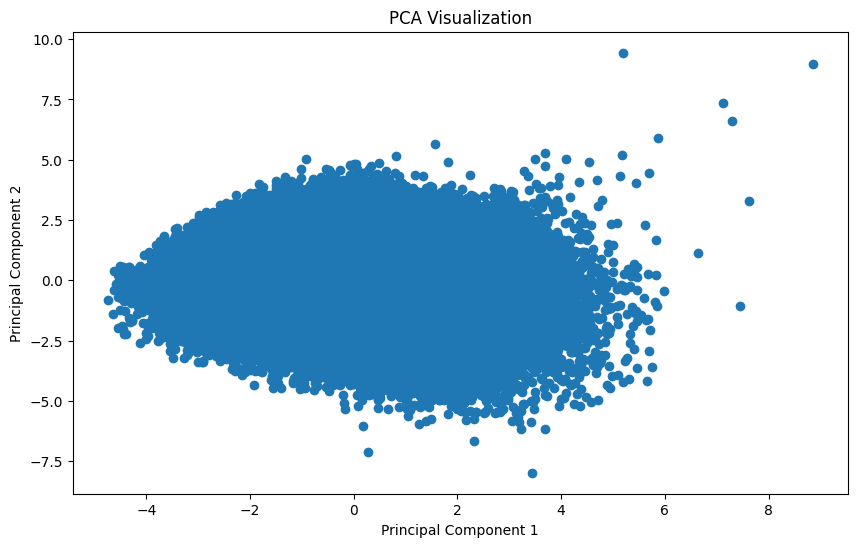

In [27]:
#PCA
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA() 
#initialize pca and fit the dataframe 
pca.fit(df)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)
# as i am interested in the first two principal components for visualization,
# I'll perform PCA with n_components=2 again
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


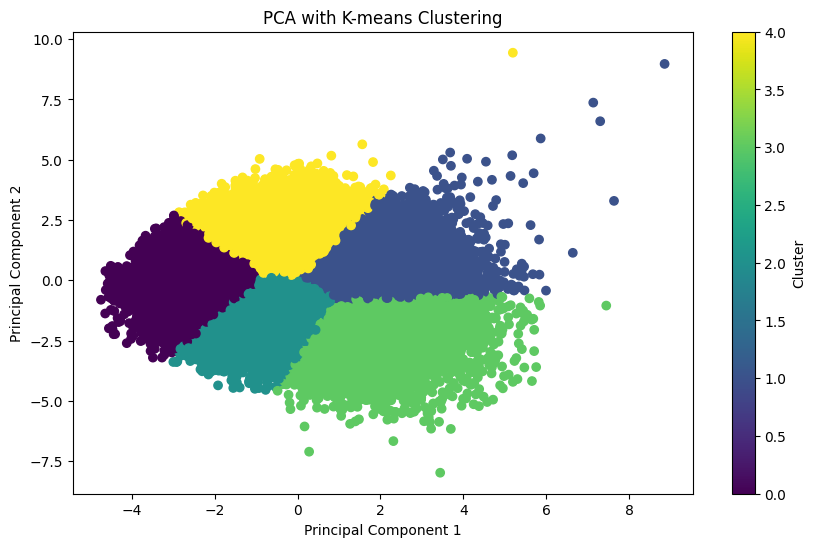

In [28]:
# K-MEANS CLUSTERING 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters as needed i wanted to see 5 clusters
#i am fitting the principal components to the k-means
kmeans.fit(pca_result)
cluster_labels = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [29]:
pca_df.columns

Index(['PC1', 'PC2'], dtype='object')

In [30]:
#DBSCAN clustering
from sklearn.cluster import DBSCAN
import numpy as np
data = pca_df[['PC1', 'PC2']].values
#here i gave the eps value as 0.5 because i wanted to see how points are there inthat cluster
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(data)



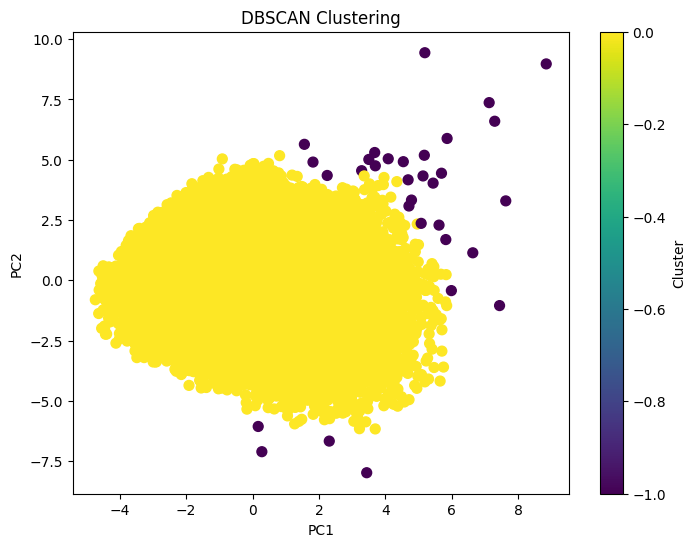

In [31]:
import matplotlib.pyplot as plt

# Scatter plot of the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


In [32]:
from sklearn.cluster import DBSCAN
import numpy as np

data = pca_df[['PC1', 'PC2']].values
#here i have changed the eps and min_sample values to see the difference between the clustering 
dbscan = DBSCAN(eps=1, min_samples=4)
cluster_labels = dbscan.fit_predict(data)


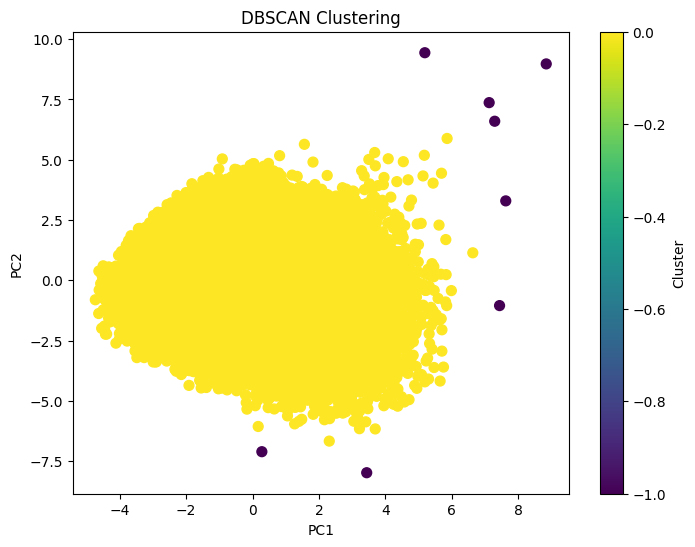

In [33]:
import matplotlib.pyplot as plt

# Scatter plot of the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


In [34]:
#column names of my dataframe
print(df.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


In [35]:
!pip install plotly pandas


In [ ]:
df.dtypes

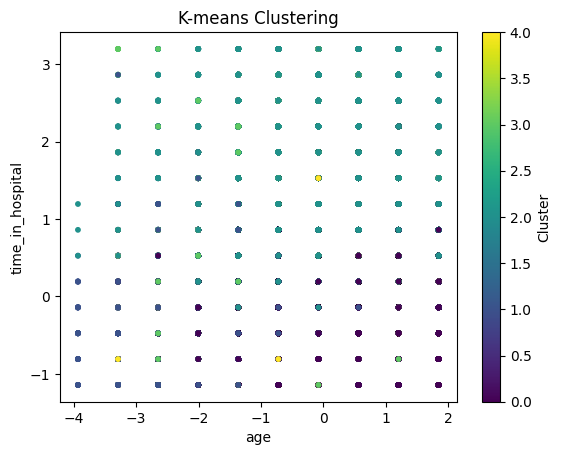

In [ ]:




from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#I have taken the features from my df to see how this clustering works for features 
selected_columns = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 
                    'number_outpatient', 'number_inpatient', 'number_diagnoses']

data = df[selected_columns].values
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
df['Cluster'] = cluster_labels
cluster_summary = df.groupby('Cluster')[selected_columns].agg(['mean', 'median'])
print(cluster_summary)
# I have taken summary of them to analyze along with the cluster

In [ ]:
# Here i have taken features from my original data frame to see the DBSCAN clustering 
from sklearn.cluster import DBSCAN
import pandas as pd
selected_columns = ['num_medications', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']
data = df[selected_columns].values
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(data)
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())
cluster_summary = df.groupby('Cluster')[selected_columns].mean()
print(cluster_summary)


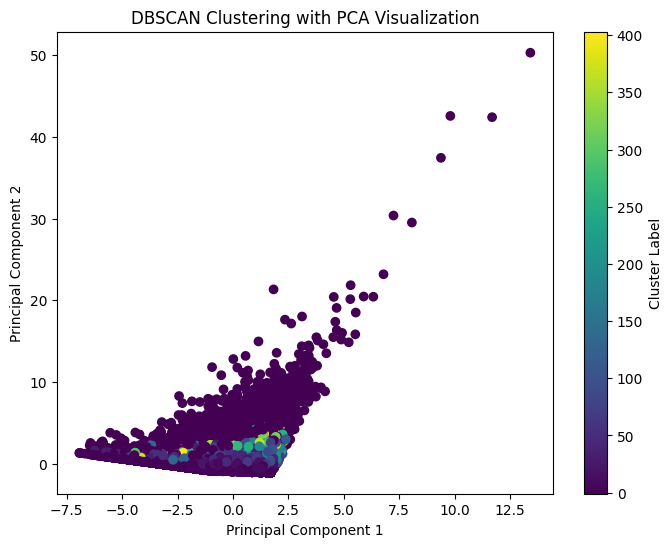

In [ ]:
# Here i did PCA for the columns i have selected for DBSCAN  to reduce the dimensionality
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
